In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3


In [34]:
#urls = ["https://www.the-numbers.com/movie/budgets/all"]
#
# for x in range(101, 2501, 100):
#     urls.append(urls[0] + "/" + str(x))
#
# urls[:5]

In-[period] and calendar grosses
Monthly, quarterly, season, and yearly charts can be viewed either by “in-[period] releases” or “calendar grosses”. Viewing by in-[period] releases shows total box office results for releases during that period, regardless of when the money was made. For example, viewing by in-year releases for 2019 shows box office results for all movies released in 2019. A movie released in 2018 will not appear on this chart even if it continued to earn money in 2019. Viewing by calendar grosses shows box office results within a given time period, regardless of when the movies were released. For example, viewing by calendar grosses for 2019 shows box office results for all movies that earned money in 2019. A movie released in 2018 may appear on this chart if it continued to earn money in 2019.

Calendar grosses are based on daily box office receipts or, when daily data is not available, estimates are used and are based on weekend and weekly data and historical box office trends. In cases where a final reported gross is different from its last reported gross for a given movie, the difference is assigned to the two weeks after the last reported gross date. In most cases, this reflects receipts that have trickled in after a movie has stopped being tracked for reportage. Since box office has been more closely tracked in recent years, the calendar gross data is generally considered more comprehensive after 2001, while pre-2001 estimates are considered approximate. Accuracy of calendar grosses improves over a wider range of time viewed.

In [2]:
for year in range(2012, 2023):
    globals()[f"box_office_{year}"] = pd.read_excel("IMDB_boxoffice_2022_2012.xlsx", sheet_name = str(year), na_values = "-" )

In [3]:
for year in range(2012, 2023):
    globals()[f"box_office_{year}"]["release_year"] = year

In [4]:
box_office_decade = pd.concat([box_office_2012,
           box_office_2013,
           box_office_2014,
           box_office_2015,
           box_office_2016,
           box_office_2017,
           box_office_2018,
           box_office_2019,
           box_office_2020,
           box_office_2021,
           box_office_2022], ignore_index=True)

In [5]:
box_office_decade.groupby("release_year").count()

,Rank,Release,Genre,Budget,Running Time,Gross,Max Th,Opening,% of Total,Open Th,Open,Close,Distributor,Estimated
release_year,,,,,,,,,,,,,,
2012,200,200,0,0,0,200,198,195,193,195,200,199,199,200
2013,200,200,0,0,0,200,200,199,198,199,200,198,197,200
2014,200,200,0,0,0,200,200,200,200,200,200,199,198,200
2015,200,200,0,0,0,200,200,198,194,198,200,199,198,200
2016,200,200,0,0,0,200,200,199,198,199,200,196,198,200
2017,200,200,0,0,0,200,200,196,196,196,200,198,198,200
2018,200,200,0,0,0,200,200,198,197,198,200,198,192,200
2019,200,200,0,0,0,200,199,197,196,197,200,136,196,200
2020,200,200,0,0,0,200,195,184,153,180,200,6,198,200


In [6]:
box_office_decade.rename(columns = {"Release": "primary_title"}, inplace= True)
box_office_decade.drop(columns = "Estimated", inplace = True)

In [7]:
con = sqlite3.connect('..\im.db')

cursor = con.cursor()


# Execute the query
# (This is a special query for finding the table names. You don't need to memorize it.)
cursor.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
# Fetch the result and store it in table_names

table_names = cursor.fetchall()

table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [8]:
movie_basics = pd.read_sql("""

SELECT *
FROM movie_basics


""", con)

In [9]:
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [10]:
movie_akas = pd.read_sql("""

SELECT *
FROM principals


""", con)

In [11]:
movie_akas

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


In [12]:
movies = pd.merge(box_office_decade, movie_basics, how = "inner", on = "primary_title")

In [13]:
movies.drop(columns= ["start_year", "original_title", "Genre", "Budget", "Running Time"], inplace= True)

In [14]:
movies["genre1"] = movies["genres"].str.split(',', expand = True)[0]
movies["genre2"] = movies["genres"].str.split(',', expand = True)[1]
movies["genre3"] = movies["genres"].str.split(',', expand = True)[2]
movies.drop(columns= ["genres", "% of Total"], inplace= True)

In [15]:
movies.sample(10)
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2441 entries, 0 to 2440
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Rank             2441 non-null   int64         
 1   primary_title    2441 non-null   object        
 2   Gross            2441 non-null   int64         
 3   Max Th           2437 non-null   object        
 4   Opening          2413 non-null   object        
 5   Open Th          2413 non-null   object        
 6   Open             2441 non-null   datetime64[ns]
 7   Close            2015 non-null   object        
 8   Distributor      2415 non-null   object        
 9   release_year     2441 non-null   int64         
 10  movie_id         2441 non-null   object        
 11  runtime_minutes  2113 non-null   float64       
 12  genre1           2407 non-null   object        
 13  genre2           1752 non-null   object        
 14  genre3           1203 non-null   object 

In [16]:
movies["Max Th"] = movies["Max Th"].str.replace(r'[^\w\s]+', '')
movies["Opening"] = movies["Opening"].str.replace(r'[^\w\s]+', '')
movies["Open Th"] = movies["Opening"].str.replace(r'[^\w\s]+', '')
movies_clean = movies
movies_clean.drop(columns = ["Max Th", "Opening", "Open Th"])
#movies_clean = movies.dropna(how = "all", subset = ["Max Th", "Opening", "Open Th"])

,Rank,primary_title,Gross,Open,Close,Distributor,release_year,movie_id,runtime_minutes,genre1,genre2,genre3
0,1,The Avengers,623357910,2022-05-04,Oct 4,Walt Disney Studios Motion Pictures,2012,tt0848228,143.0,Action,Adventure,Sci-Fi
1,2,The Dark Knight Rises,448139099,2022-07-20,Dec 13,Warner Bros.,2012,tt1345836,164.0,Action,Thriller,None
2,3,The Hunger Games,408010692,2022-03-23,Sep 6,Lionsgate,2012,tt1392170,142.0,Action,Adventure,Sci-Fi
3,4,Skyfall,304360277,2022-11-09,Mar 10,Sony Pictures Entertainment (SPE),2012,tt1074638,143.0,Action,Adventure,Thriller
4,5,The Hobbit: An Unexpected Journey,303003568,2022-12-14,Apr 25,Warner Bros.,2012,tt0903624,169.0,Adventure,Family,Fantasy
...,...,...,...,...,...,...,...,...,...,...,...,...
2436,193,The Territory,26464,2022-08-19,NaN,Picturehouse Entertainment,2022,tt2574238,40.0,Documentary,News,None
2437,194,The Innocents,25705,2022-05-13,NaN,IFC Films,2022,tt4370784,115.0,Drama,History,None
2438,194,The Innocents,25705,2022-05-13,NaN,IFC Films,2022,tt4677348,98.0,Horror,None,None
2439,198,1982,23241,2022-06-10,NaN,Tricycle Logic,2022,tt2388621,90.0,Drama,None,None


In [17]:
# movies_clean["Max Th"] = movies_clean["Max Th"].apply(lambda x: float(x))
# movies_clean["Opening"] = movies_clean["Opening"].apply(lambda x: float(x))
# movies_clean["Open Th"] = movies_clean["Open Th"].apply(lambda x: float(x))

In [18]:
movies_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2441 entries, 0 to 2440
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Rank             2441 non-null   int64         
 1   primary_title    2441 non-null   object        
 2   Gross            2441 non-null   int64         
 3   Max Th           838 non-null    object        
 4   Opening          2159 non-null   object        
 5   Open Th          2159 non-null   object        
 6   Open             2441 non-null   datetime64[ns]
 7   Close            2015 non-null   object        
 8   Distributor      2415 non-null   object        
 9   release_year     2441 non-null   int64         
 10  movie_id         2441 non-null   object        
 11  runtime_minutes  2113 non-null   float64       
 12  genre1           2407 non-null   object        
 13  genre2           1752 non-null   object        
 14  genre3           1203 non-null   object 

In [19]:
movies_per_year = movies.groupby("release_year")["release_year"].count()
years = movies["release_year"].value_counts().keys().sort_values()
values = movies["release_year"].value_counts()

years

Int64Index([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype='int64')

In [20]:
movies_per_year

release_year
2012    234
2013    241
2014    254
2015    312
2016    258
2017    286
2018    248
2019    250
2020    158
2021    113
2022     87
Name: release_year, dtype: int64

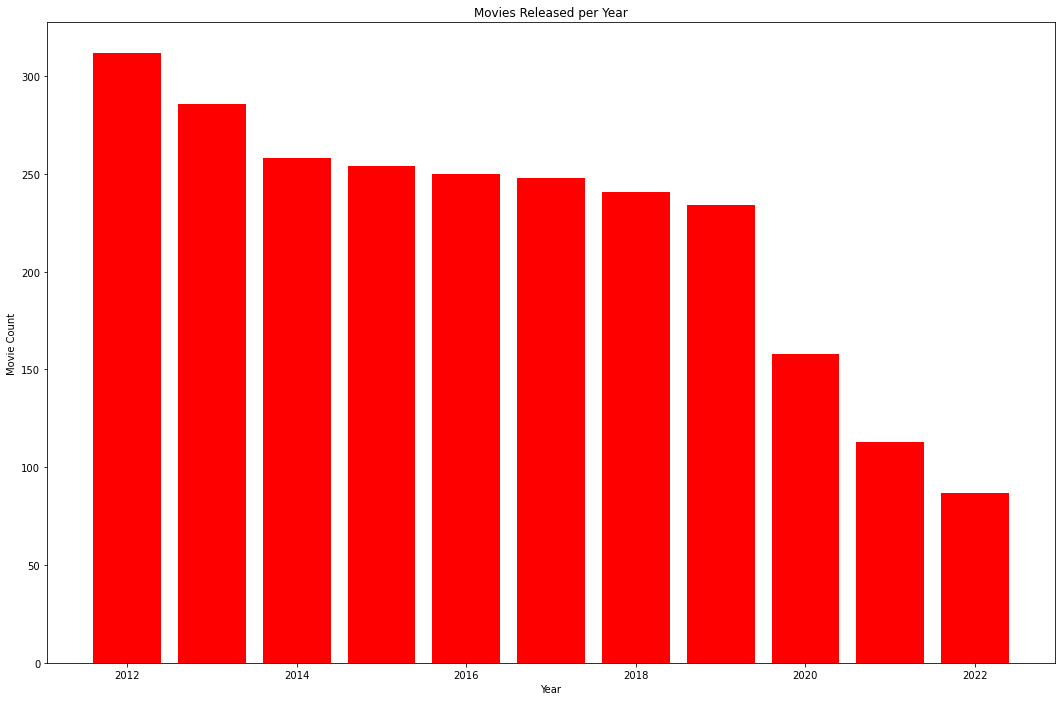

In [21]:
fig, ax = plt.subplots(figsize=(15,10))

# sets up bar plot
ax.bar(years, values, color = "red")
ax.set_xlabel('Year')
#ax.set_xticklabels(rotation=40)
ax.set_ylabel('Movie Count')
ax.set_title('Movies Released per Year')
plt.rcParams.update({'font.size': 15})
plt.tight_layout()
plt.show();

In [22]:
avg_per_genre = movies_clean.groupby("genre1")["Gross"].mean().sort_values(ascending= False)
avg_per_genre

genre1
Family         2.094847e+08
Musical        2.011514e+08
Music          1.022857e+08
Adventure      9.292451e+07
Action         8.518845e+07
Fantasy        8.035287e+07
Sci-Fi         7.338972e+07
Animation      6.912348e+07
Crime          3.989427e+07
Horror         3.743442e+07
Comedy         3.418099e+07
Documentary    3.107247e+07
Thriller       3.052411e+07
Biography      3.038523e+07
Drama          3.012518e+07
Romance        1.215888e+07
Mystery        1.165593e+07
Western        5.399732e+06
Sport          5.310554e+06
War            3.727550e+05
Name: Gross, dtype: float64

<ipython-input-23-7de20c306644>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(avg_per_genre.keys(), rotation=40)


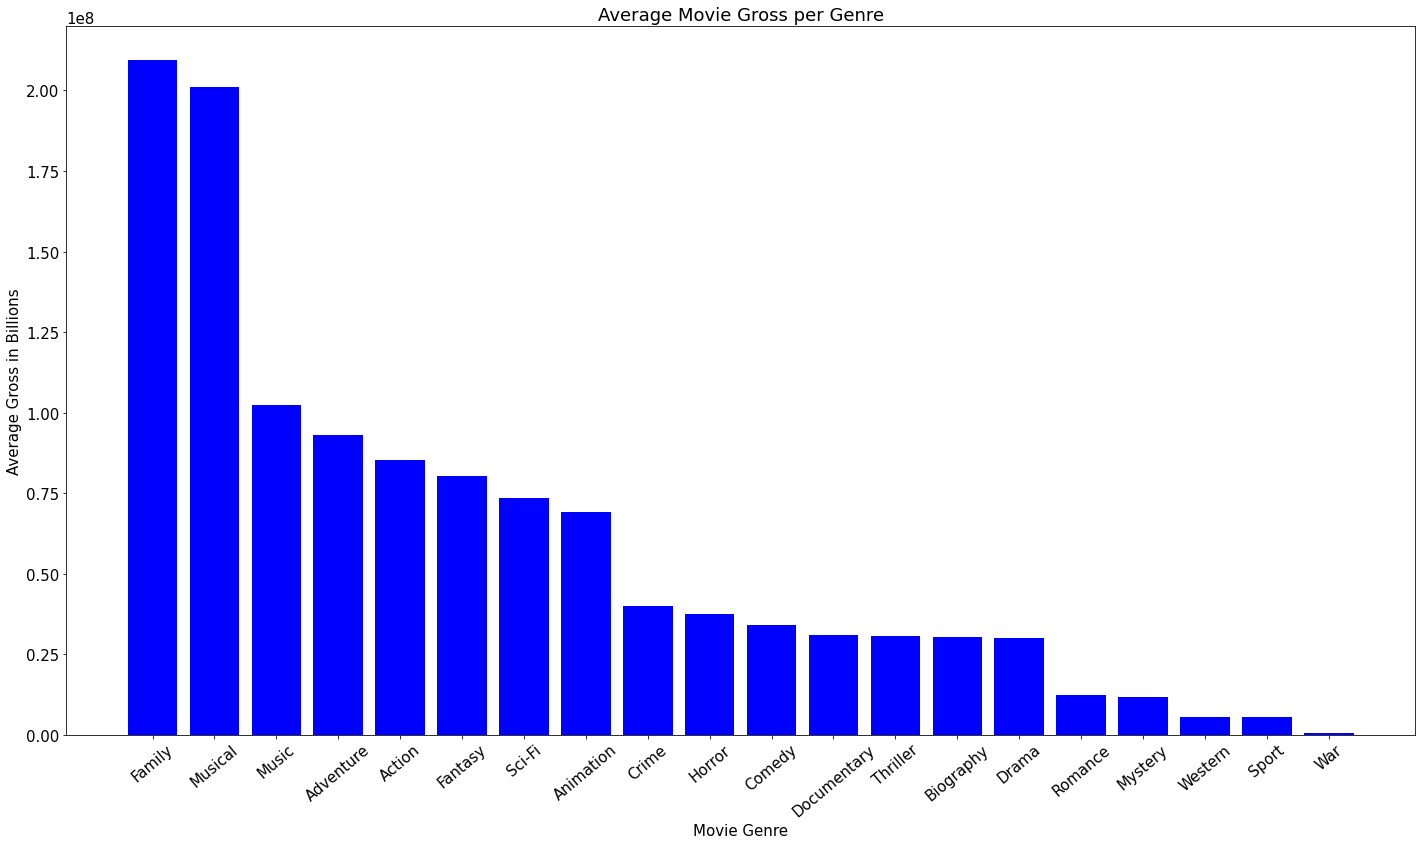

In [23]:
fig, ax = plt.subplots(figsize=(20,12))

# sets up bar plot
ax.bar(avg_per_genre.keys(), avg_per_genre, color = "blue")
ax.set_xlabel('Movie Genre')
ax.set_xticklabels(avg_per_genre.keys(), rotation=40)
ax.set_ylabel('Average Gross in Billions')
ax.set_title('Average Movie Gross per Genre')
plt.rcParams.update({'font.size': 15})
plt.tight_layout()
plt.show();

In [25]:
movies_clean["release_month"] = movies_clean["Open"].apply(lambda x: x.strftime("%b"))

movies_clean

,Rank,primary_title,Gross,Max Th,Opening,Open Th,Open,Close,Distributor,release_year,movie_id,runtime_minutes,genre1,genre2,genre3,release_month
0,1,The Avengers,623357910,4349,207438708,207438708,2022-05-04,Oct 4,Walt Disney Studios Motion Pictures,2012,tt0848228,143.0,Action,Adventure,Sci-Fi,May
1,2,The Dark Knight Rises,448139099,4404,160887295,160887295,2022-07-20,Dec 13,Warner Bros.,2012,tt1345836,164.0,Action,Thriller,None,Jul
2,3,The Hunger Games,408010692,4137,152535747,152535747,2022-03-23,Sep 6,Lionsgate,2012,tt1392170,142.0,Action,Adventure,Sci-Fi,Mar
3,4,Skyfall,304360277,3526,88364714,88364714,2022-11-09,Mar 10,Sony Pictures Entertainment (SPE),2012,tt1074638,143.0,Action,Adventure,Thriller,Nov
4,5,The Hobbit: An Unexpected Journey,303003568,4100,84617303,84617303,2022-12-14,Apr 25,Warner Bros.,2012,tt0903624,169.0,Adventure,Family,Fantasy,Dec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436,193,The Territory,26464,7,26464,26464,2022-08-19,NaN,Picturehouse Entertainment,2022,tt2574238,40.0,Documentary,News,None,Aug
2437,194,The Innocents,25705,32,12330,12330,2022-05-13,NaN,IFC Films,2022,tt4370784,115.0,Drama,History,None,May
2438,194,The Innocents,25705,32,12330,12330,2022-05-13,NaN,IFC Films,2022,tt4677348,98.0,Horror,None,None,May
2439,198,1982,23241,2,4900,4900,2022-06-10,NaN,Tricycle Logic,2022,tt2388621,90.0,Drama,None,None,Jun


In [33]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

movies_clean['month'] = pd.Categorical(movies_clean['release_month'], categories=months, ordered=True)

movies_clean.sort_values(by="month",inplace=True)  # same as you have now; can use inplace=True

months = movies_clean.groupby("month")["Gross"].mean().keys()
avg_gross_per_month = movies_clean.groupby("month")["Gross"].mean()

<ipython-input-35-dd7d5d463b6e>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(months, rotation=40)


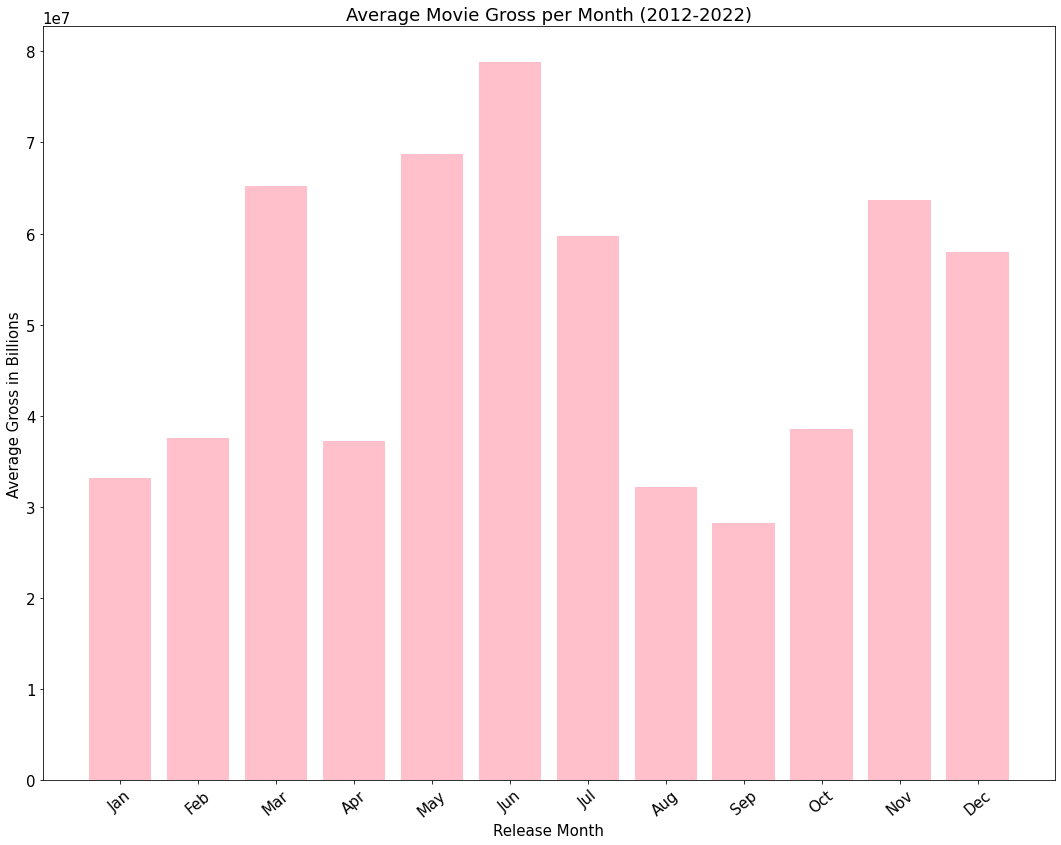

In [35]:
fig, ax = plt.subplots(figsize=(15,12))

# sets up bar plot
ax.bar(months, avg_gross_per_month, color = "pink")
ax.set_xlabel('Release Month')
ax.set_xticklabels(months, rotation=40)
ax.set_ylabel('Average Gross in Billions')
ax.set_title('Average Movie Gross per Month (2012-2022)')
plt.rcParams.update({'font.size': 15})
plt.tight_layout()
plt.show();